# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 2384 Поглазов Никита Васильевич и Вовченко София Евгеньевна. Вариант №14.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ). 

## Основные теоретические положения

### Дискретное преобразование Фурье

$x[n]$ - периодический дискретный сигнал. Коэффициенты его спектра можно получить с помощью дискретного преобразования Фурье (ДПФ):

$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-i \frac{2\pi}{N} kn}$$

где $k$ — номер гармоники, $\omega_k = \frac{2\pi k}{N}$ — соответствующая круговая частота.

### Связь спектров до и после фильтрации
$$ Y(z) = H(z)X(z),$$
где $Y(z)$ - спектр сигнала после фильтрации, $H(z)$ - передаточная функция, $X(z)$ - спектр сигнала до фильтрации

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

- Сформировать дискретный сигнал посредством дискретизации с шагом $ T = 1 $ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $ A_k\cos(\omega_kt + \varphi_k) $. Частота каждой из гармоник не должна превышать $ \pi $. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $ \pi $, изменяющимися с шагом $ \Delta\omega = 0.1\pi $. Амплитуды гармоник $ A_k $ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $ \varphi_k $ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($ N = 31 $).

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
np.random.seed(14)

In [43]:
size = 11
omega = np.linspace(0, np.pi, size)
A = np.random.randint(1, 12, size).astype(float)
A /= A.sum()
phi = np.random.uniform(0, 0.5, size)

In [44]:
def s(t: np.ndarray) -> np.ndarray:
    return np.sum(A * np.cos(omega * t.reshape(-1, 1) + phi), axis=1)

In [45]:
N = 31
T = 1

In [46]:
x = np.arange(0, N + 1, T)
x_analog = np.linspace(0, N, 1000)
y = s(x)

  - Визуализировать исходные аналоговый и дискретизированный сигналы.


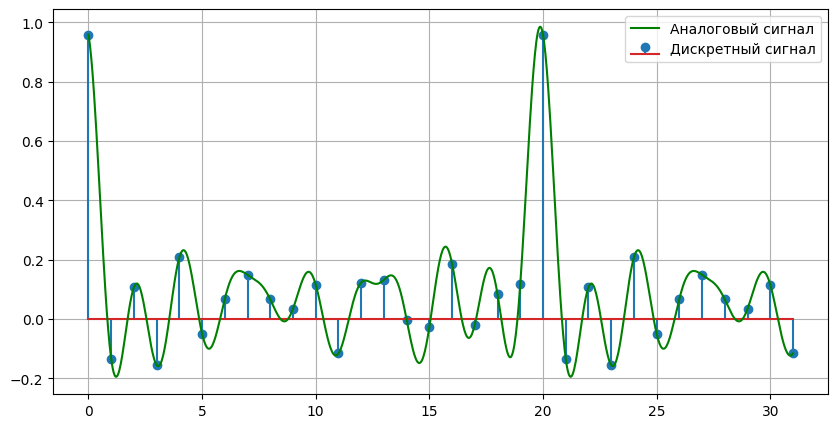

In [47]:
plt.figure(figsize=(10, 5))
plt.stem(x, y, label="Дискретный сигнал")
plt.plot(x_analog, s(x_analog), color="green", label="Аналоговый сигнал")
plt.legend()
plt.grid()

  - С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

In [48]:
Y = np.fft.fft(y)

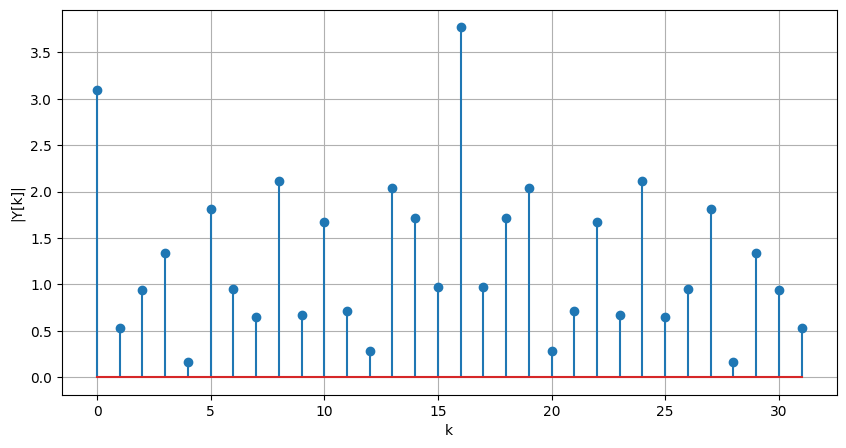

In [49]:
plt.figure(figsize=(10, 5))
plt.stem(range(N + 1), np.abs(Y))
plt.xlabel("k")
plt.ylabel("|Y[k]|")
plt.grid()

  - Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $ H(\omega) $ -- передаточной функции (частотной характеристики) фильтра.


Линейное сглаживание по $2h+1$ точкам:

$$
y_n=\frac1{2h+1}\sum^{k=n+h}_{k=n-h}s_k
$$

Передаточная функция (в общем виде):

$$
H_{2h+1}(\omega) = \frac{1}{2h + 1} \frac{\sin\left( (2h + 1) \frac{\omega}{2} \right)}{\sin\left( \frac{\omega}{2} \right)}
$$

In [50]:
def apply_kernel(signal: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    pad_size = len(kernel) // 2
    y_padded = np.pad(
        signal, (pad_size, pad_size), mode="wrap"
    )  # wrap для корректного спектрального анализа (циклическая свертка)
    return np.convolve(
        y_padded, kernel, mode="valid"
    )  # valid для использования только тех отсчетов, которые не выходят за границы массива

In [51]:
y_l_smoothed_5 = apply_kernel(y, np.ones(5) / 5)
y_l_smoothed_9 = apply_kernel(y, np.ones(9) / 9)

  - Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.


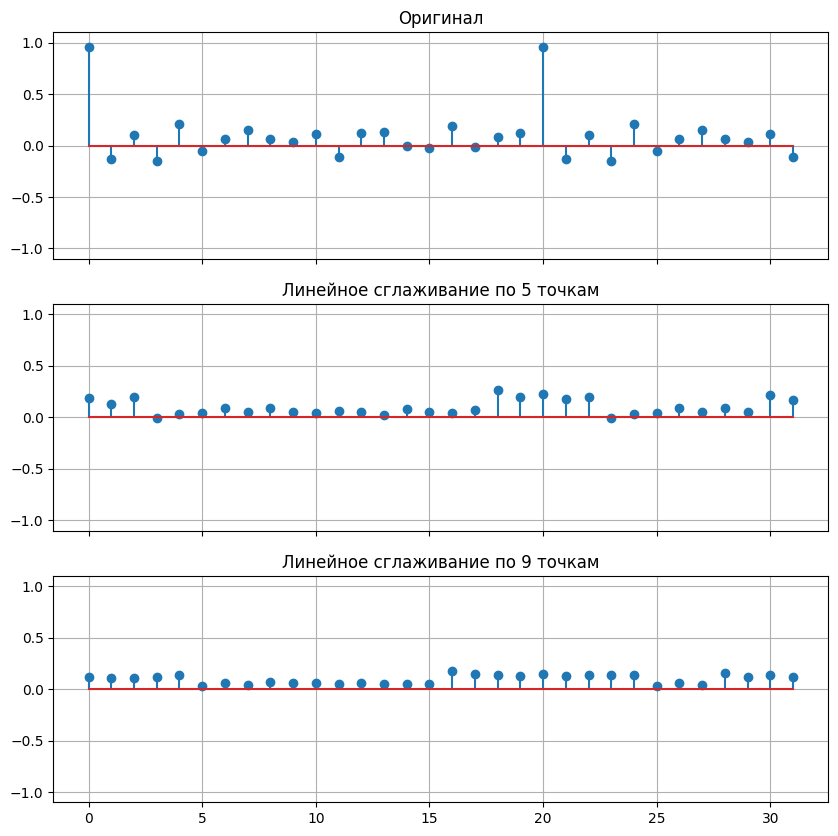

In [52]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

ys = y, y_l_smoothed_5, y_l_smoothed_9
titles = (
    "Оригинал",
    "Линейное сглаживание по 5 точкам",
    "Линейное сглаживание по 9 точкам",
)

for ax, y_data, title in zip(axes, ys, titles):
    ax.set_title(title)
    ax.stem(x, y_data)
    ax.set_ylim(-1.1, 1.1)
    ax.grid()

  - С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.


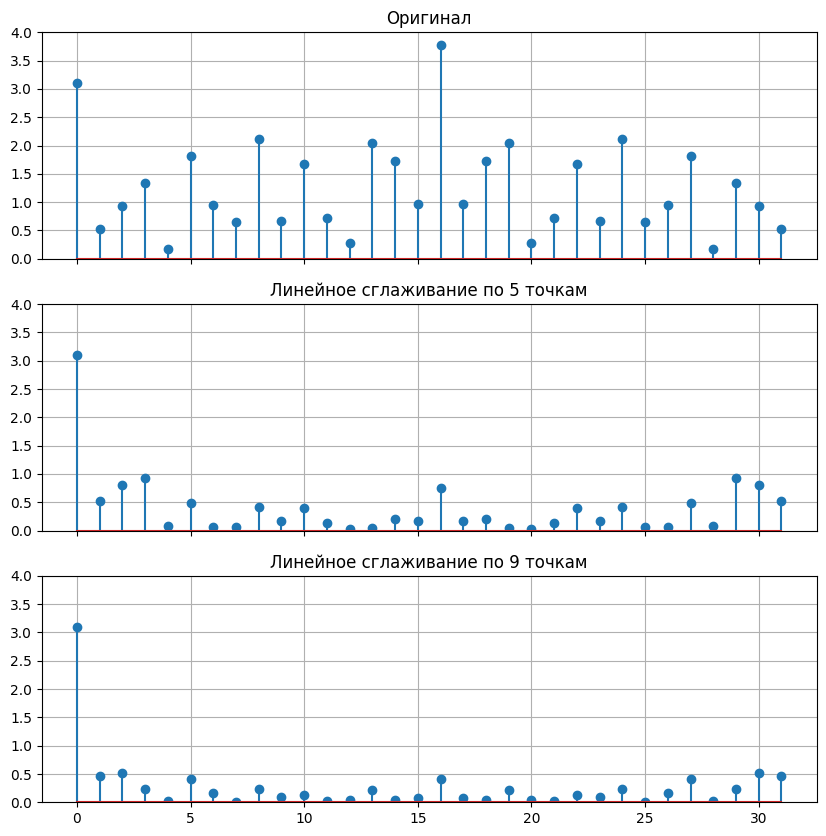

In [53]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

ys = y, y_l_smoothed_5, y_l_smoothed_9
titles = (
    "Оригинал",
    "Линейное сглаживание по 5 точкам",
    "Линейное сглаживание по 9 точкам",
)

for ax, y_data, title in zip(axes, ys, titles):
    ax.set_title(title)
    Y = np.fft.fft(y_data)
    ax.stem(range(N + 1), np.abs(Y))
    ax.set_ylim(0, 4)
    ax.grid()

  - Проанализировать результат на соответствие значениям $ H(\omega) $. Сделать выводы.

In [54]:
def H_linear(omega: np.ndarray, window_size: int) -> np.ndarray:
    omega_half = omega / 2
    numerator = np.sin(omega_half * window_size)
    denominator = window_size * np.sin(omega_half)

    res = np.ones_like(omega)
    mask = np.abs(denominator) > 1e-10
    res[mask] = numerator[mask] / denominator[mask]
    return res

Text(0.5, 0, 'Индекс отсчета $k$')

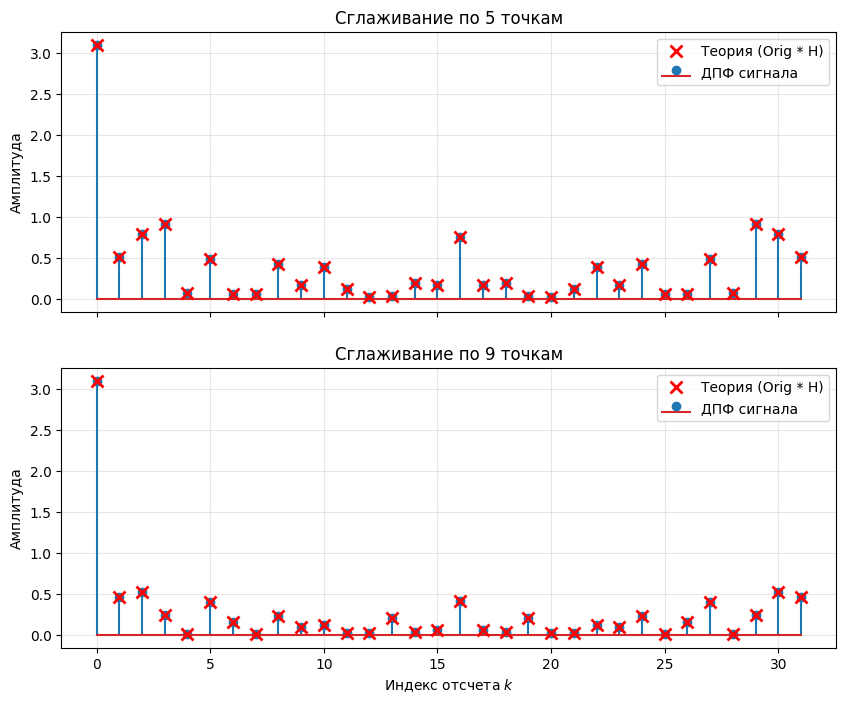

In [55]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

TOTAL_POINTS = N + 1
omega = x / TOTAL_POINTS * 2 * np.pi

Y_orig = np.fft.fft(y)
Y_orig_abs = np.abs(Y_orig)

ys = y_l_smoothed_5, y_l_smoothed_9
windows = 5, 9
titles = "Сглаживание по 5 точкам", "Сглаживание по 9 точкам"

for ax, y_data, window, title in zip(axes, ys, windows, titles):
    ax.set_title(title)

    Y_curr = np.fft.fft(y_data)

    markerline, stemlines, baseline = ax.stem(x, np.abs(Y_curr), label="ДПФ сигнала")
    plt.setp(stemlines, "linewidth", 1.5)

    H_vals = np.abs(H_linear(omega, window))
    Y_theory = Y_orig_abs * H_vals

    ax.plot(
        x, Y_theory, "rx", markersize=8, markeredgewidth=2, label="Теория (Orig * H)"
    )
    ax.legend()

    ax.set_ylabel("Амплитуда")
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel("Индекс отсчета $k$")

На графиках видно точное соответствие теоретических (красные метки) и экспериментальных (синие отсчеты) значений спектра, что подтверждает корректность расчетов.

  - Повторить п. 4--7 для следующих фильтров:
    - Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
    - Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

### Численное дифференцирование 1-го порядка

$$y_{n} = \frac{s_{n+1} - s_{n-1}}{2T}$$

Передаточная функция:

$$H(\omega) = \frac{e^{i\omega} - e^{-i\omega}}{2T} = \frac{i\sin(\omega)}{T}$$

### Численное интегрирование по формуле прямоугольников (правых)

$$y_{n} = y_{n-1} + s_i \cdot T$$

Передаточная функция:

$$H(\omega) = \frac{T}{1 - e^{-i\omega}}$$

### Численное интегрирование по формуле трапеций

$$y_{n} = y_{n-1} + T\frac{s_{n-1} + s_{n}}{2}$$

Передаточная функция:

$$H(\omega) = T\frac{1 + e^{-i\omega}}{2(1 - e^{-i\omega})}$$

### Численное интегрирование по формуле Симпсона

$$y_{n+1} = y_{n-1} + \frac{s_{n-1} + 4s_{n} + s_{n+1}}{3} \cdot T$$

Передаточная функция:

$$H(\omega) = T\frac{1 + 4e^{-i\omega} + e^{-2i\omega}}{3(1 - e^{-2i\omega})}$$


In [128]:
def differentiate(signal: np.ndarray) -> np.ndarray:
    y = (np.roll(signal, -1) - np.roll(signal, 1)) / (2 * T)
    return y


def H_differentiate(omega: np.ndarray) -> np.ndarray:
    return 1j * np.sin(omega) / T

In [123]:
def integrate_rectangles(signal: np.ndarray) -> np.ndarray:
    y = np.zeros_like(signal)
    for i in range(1, len(signal)):
        y[i] = y[i - 1] + signal[i] * T
    return y


def H_integrate_rectangles(omega: np.ndarray) -> np.ndarray:
    numerator = T
    denominator = 1 - np.exp(-1j * omega)
    return np.divide(
        numerator, denominator, where=~np.isclose(np.abs(denominator), 0), out=np.ones_like(omega, dtype=np.complex128)
    )

In [124]:
def integrate_trapezoids(signal: np.ndarray) -> np.ndarray:
    y = np.zeros_like(signal)
    for i in range(1, len(signal)):
        y[i] = y[i - 1] + (signal[i] + signal[i - 1]) * T / 2 
    return y

def H_integrate_trapezoids(omega: np.ndarray) -> np.ndarray:
    numerator = (T / 2) * (1 + np.exp(-1j * omega))
    denominator = 1 - np.exp(-1j * omega)
    return np.divide(
        numerator, denominator, where=~np.isclose(np.abs(denominator), 0), out=np.ones_like(omega, dtype=np.complex128)
    )

In [125]:
def integrate_simpson(signal: np.ndarray) -> np.ndarray:
    y = np.zeros_like(signal)
    for i in range(2, len(signal)):
        y[i] = y[i - 2] + (signal[i] + 4 * signal[i - 1] + signal[i - 2]) * (T / 3)
    return y


def H_integrate_simpson(omega: np.ndarray) -> np.ndarray:
    exp_jw = np.exp(-1j * omega)
    numerator = (T / 3) * (1 + 4 * exp_jw + exp_jw**2)
    denominator = 1 - exp_jw**2
    return np.divide(
        numerator, denominator, where=~np.isclose(np.abs(denominator), 0), out=np.ones_like(omega, dtype=np.complex128)
    )

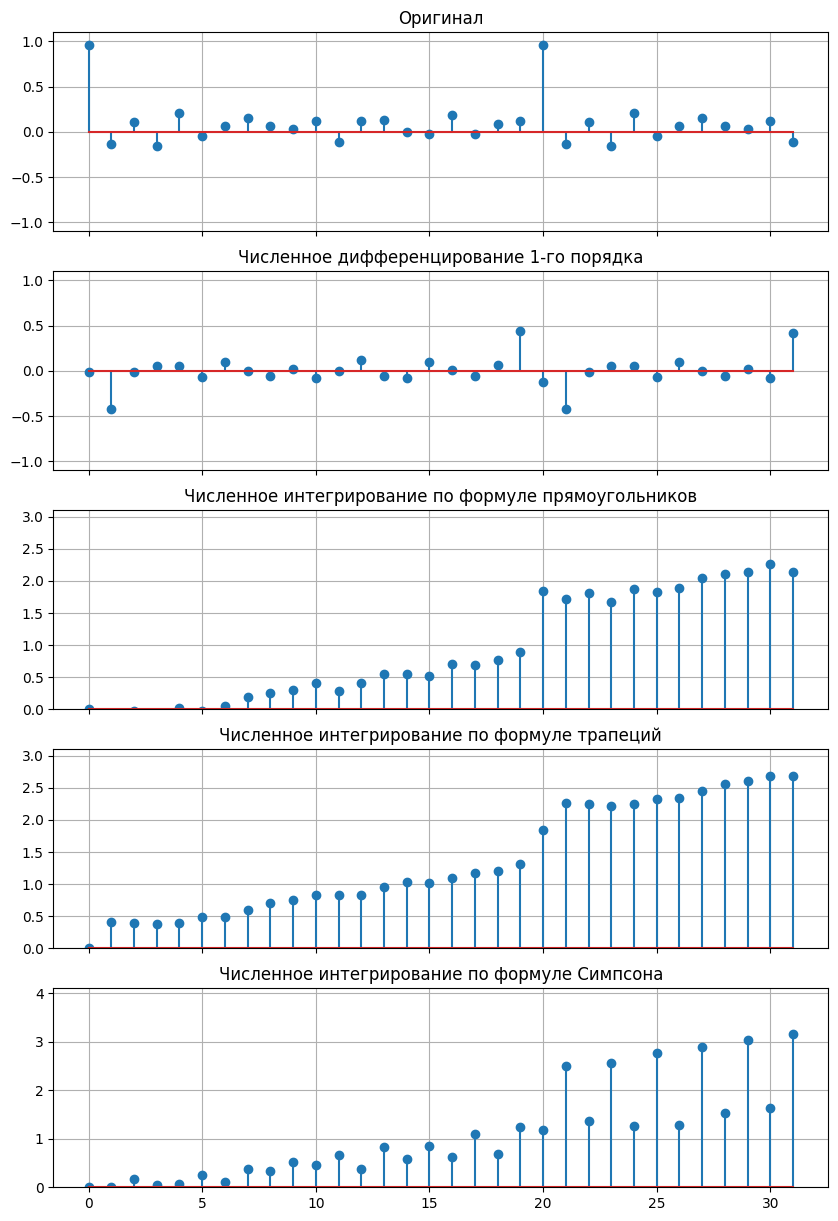

In [126]:
ys = (
    y,
    differentiate(y),
    integrate_rectangles(y),
    integrate_trapezoids(y),
    integrate_simpson(y),
)
titles = (
    "Оригинал",
    "Численное дифференцирование 1-го порядка",
    "Численное интегрирование по формуле прямоугольников",
    "Численное интегрирование по формуле трапеций",
    "Численное интегрирование по формуле Симпсона",
)
ylims = ((-1.1, 1.1), (-1.1, 1.1), (0, 3.1), (0, 3.1), (0, 4.1))

fig, axes = plt.subplots(len(ys), 1, sharex=True, figsize=(10, 15))

for ax, y_data, title, ylim in zip(axes, ys, titles, ylims):
    ax.set_title(title)
    ax.stem(x, y_data)
    ax.set_ylim(*ylim)
    ax.grid()

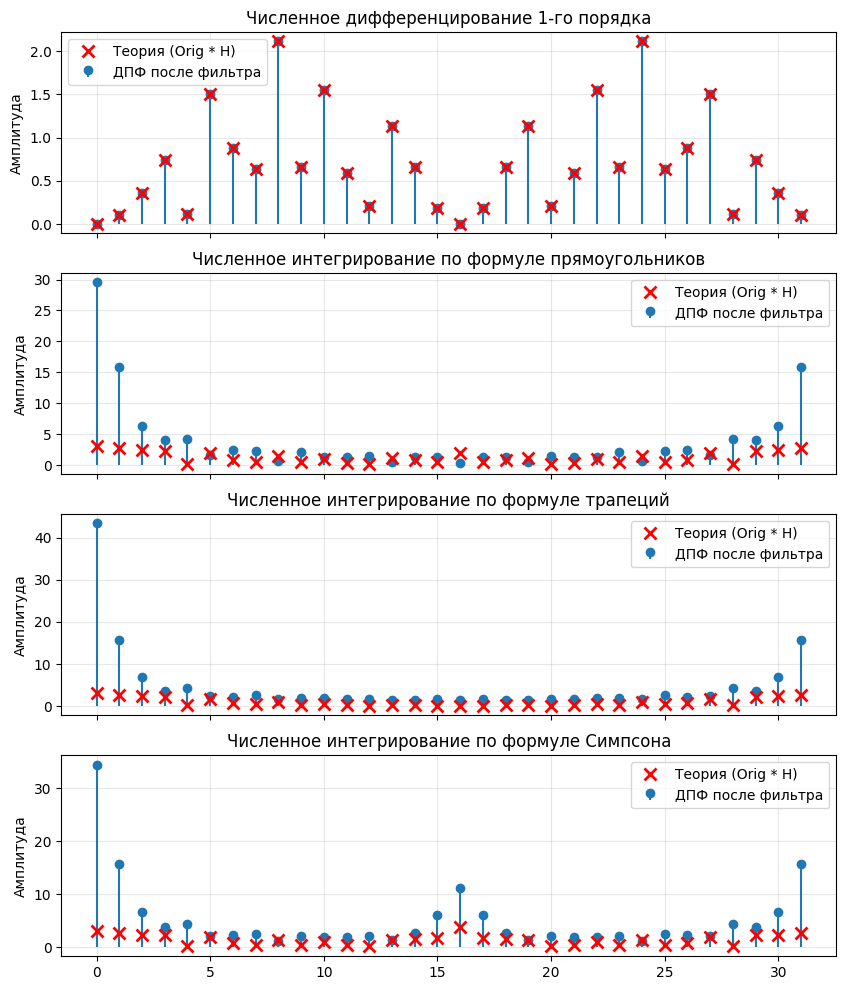

In [127]:
Y_orig_abs = np.abs(np.fft.fft(y))

fig, axes = plt.subplots(len(ys) - 1, 1, figsize=(10, 12), sharex=True)

Hs = (
    H_differentiate,
    H_integrate_rectangles,
    H_integrate_trapezoids,
    H_integrate_simpson,
)

for ax, y_data, title, H in zip(axes, ys[1:], titles[1:], Hs):
    Y_smooth_abs = np.abs(np.fft.fft(y_data))

    H_teor = np.abs(H(omega))
    Y_teor = Y_orig_abs * H_teor

    ax.set_title(title)

    markerline, stemlines, baseline = ax.stem(
        x, Y_smooth_abs, label="ДПФ после фильтра", basefmt=" "
    )
    plt.setp(stemlines, "linewidth", 1.5)

    ax.plot(x, Y_teor, "rx", markersize=8, markeredgewidth=2, label="Теория (Orig * H)")

    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylabel("Амплитуда")

Благодаря использованию круговой свертки в реализации фильтра дифференцирования 1-го порядка, удалось достичь точного совпадения теоретических и практических амплитуд ДПФ.

В свою очередь, несовпадение теоретических и практических амплитуд ДПФ для интегрирующих фильтров объясняется произвольным выбором начального условия ($y_0 = 0$), которое не совпадает с теоретическим значением первообразной сигнала в начальный момент времени. Это вносит постоянную составляющую и переходный процесс, искажающие спектр на короткой выборке.

Метод Симпсона является рекурсивным фильтром с шагом 2. Это приводит к независимой обработке четных и нечетных отсчетов. Кроме того, передаточная функция имеет полюс на частоте Найквиста ($z=−1$), что делает фильтр неустойчивым к высокочастотным составляющим. В результате возникает осцилляция с частотой $\pi$, которую мы и наблюдаем на графике.

## Выводы
В ходе лабораторной работы сделана фильтрация сигнала дискретными фильтрами, основанными на формулах численного дифференцирования и интегрирования. Также получены спектры для изначального и отфильтрованного сигнала с использованием ДПФ. Выявлено соответствие при сравнении результатов и передаточных функций.
